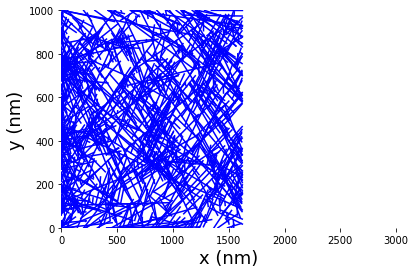

In [1]:
# Import libraries
from numpy import array, zeros, pi, cos, sin, mod, int, argmin, append, amax, exp
from numpy.random import rand, poisson, randn, choice
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, xlim, ylim, box

# Define constants.
N = 200 # Initial number of filaments
L = 1000.0 # Length of leading edge in nanometers
kPol = 100.0 # Polymerization rate in subunits per second
kBr = kPol / 100 # branch rate in branches per second
kCap = kPol / 100 # cap rate in branches per second
d = 2.7 # Width of subunit in nanometers
w = 10 * d # Width of branching region.
muTheta = 70.0 / 180 * pi
muSigma = 5.0 / 180 * pi
extForce = 1e2 # external force in pN.

# Initialize.
t = 0.0 # Time in seconds.
dt = 1e-3 # Simulation time interval in seconds
tTotal = 10.0 # Total simulation time in seconds
xPointArr = zeros(N) # x-coordinate of barbed end position
yPointArr = L * rand(N) # y-coordinate of barbed end position
thetaArr = pi * rand(N) - pi / 2 # angle of barbed end with respect to x-axis
uArr = d * cos(thetaArr) # x-coordinate of theta
vArr = d * sin(thetaArr) # y-coordinate of theta
xBarbArr = xPointArr
yBarbArr = yPointArr
xLead = amax(xBarbArr)
isCappedArr = zeros(N)
n = int(tTotal / dt)

# Define functions.
def elongate(x, y, u, v, L):
    xNew = x + u
    yNew = mod(y + v, L) # Enforce periodic boundary in the y direction.
    return xNew, yNew

def branch(u, v):
    theta = choice([-1, 1]) * muTheta + muSigma * randn()
    uNew = u * cos(theta) - v * sin(theta)
    if uNew > 0:
        vNew = u * sin(theta) + v * cos(theta)
    else:
        uNew = u * cos(theta) + v * sin(theta)
        vNew = -u * sin(theta) + v * cos(theta)
    return uNew, vNew

# Iterate.
for i in range(n):
    N = len(xBarbArr)
    isActiveArr = xLead - xBarbArr <= w
    isTouchingArr = xLead - xBarbArr < d
    nTouching = sum(isTouchingArr)
    forceWeight = exp(-extForce * d / 4.114 / nTouching)
    for j in range(N):
        if isCappedArr[j] == 0:
            # Cap.
            if isTouchingArr[j] == False:
                capProb = poisson(kCap * dt)
            else:
                capProb = poisson(kCap * forceWeight * dt)
            if bool(capProb) == True:
                isCappedArr[j] = 1
                continue
            # Branch.
            if bool(poisson(kBr * isActiveArr[j] * dt)) == True:
                xPointArr = append(xPointArr, xBarbArr[j])
                yPointArr = append(yPointArr, yBarbArr[j])
                xBarbArr = append(xBarbArr, xBarbArr[j])
                yBarbArr = append(yBarbArr, yBarbArr[j])
                uNew, vNew = branch(uArr[j], vArr[j])
                uArr = append(uArr, uNew)
                vArr = append(vArr, vNew)
                isCappedArr = append(isCappedArr, 0)
            # Elongate.
            if isTouchingArr[j] == False:
                polProb = poisson(kPol * isActiveArr[j] * dt)
            else:
                polProb = poisson(kPol * forceWeight * dt)
            if bool(polProb) == True:
                xBarbArr[j] = xBarbArr[j] + uArr[j]
                yBarbArr[j] = yBarbArr[j] + vArr[j]
                if yBarbArr[j] >= L:
                    yBarbArr[j] = mod(yBarbArr[j], L)
                    yPointArr[j] = 0.0
                else:
                    if yBarbArr[j] < 0:
                        yBarbArr[j] = L + yBarbArr[j]
                        yPointArr[j] = L
    xLead = amax(xBarbArr)

plot([xPointArr, xBarbArr], [yPointArr, yBarbArr], 'b')
xlabel(r"x (nm)", fontsize = 18)
ylabel(r"y (nm)", fontsize = 18)
xlim(0, 3000)
ylim(0, 1000)
box()

1778.396856067504
159
0.1203823317077332


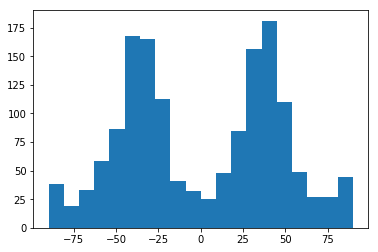

In [179]:
from numpy import arctan
from matplotlib.pyplot import hist
hist(arctan(vArr / uArr) / pi * 180, 20)
print(xLead)
print(sum(isActiveArr))
print(forceWeight)